# Styling plots for publication with `matplotlib`

## Table of contents

* [Motivation](#Motivation)
* [Content](#Content)
* [Preparation](#Preparation)
* [What do you want to plot?](#What-do-you-want-to-plot?)
* [Set up the workspace](#Set-up-the-workspace)
* [Let's make some plots!](#Let's-make-some-plots!)
* [Unstylized plots](#Unstylized-plots)
* [Stylizing specific plot types](#Stylizing-specific-plot-types)
    * [Line plots](#Line-plots)
    * [Scatter plots](#Scatter-plots)
    * [Bar charts](#Bar-charts)
    * [Box plots](#Box-plots)
    * [Helper functions](#Helper-functions)
* [Putting it all together with axes styling](#Putting-it-all-together-with-axes-styling)
    * [Axes labels](#Axes-labels)
    * [Consistent tick labeling](#Consistent-tick-labeling)
    * [Chart titles](#Chart-titles)
* [Adjusting the layout](#Adjusting-the-layout)
* [The final product](#The-final-product)

## Motivation

While working in an academic research lab, I was often tasked with generating figures for myself or colleagues for use in publications and presentations. In looking for an alternative to the unwieldy Excel and the rather sterile GraphPad, I came upon Python's popular plotting library `matplotlib`. Not only is `matplotlib` free and open source, but I've found it can accomplish almost any plotting task I throw at it. I decided to put this notebook together to share with others what I've learned and to serve as a personal reference.

## Content

This notebook covers how to take your processed data and turn it into a publication-ready plot using Python and `matplotlib`. It is meant to guide a user with no knowledge of `matplotlib` through the process of creating reasonably styled plots and figures that can be tweaked and adjusted as desired.

## Preparation

To follow along, this notebook assumes you have Python and `matplotlib` installed. If you're running linux (I am running Arch Linux) then you can find these packages in your distro's repositories. If you are on Windows or OS X, I'd recommend using the [Anaconda Scientific Python Distribution](https://store.continuum.io/cshop/anaconda/) which provides either Python 2 or 3 bundled nicely with commonly used scientific packages and an easy-to-use package manager called `conda`. As of this writing I'm using Python 3.4.3 and `matplotlib` 1.4.3.

You can also use [`pip`](https://pip.pypa.io/en/stable/) to install the required packages from the [Python Package Index](https://pypi.python.org/pypi) if you'd rather go that route.

## What do you want to plot?

Before starting any plotting task--especially one centered around creating a figure for others to interpret--it is extremely useful to first sketch out what you want the end product to look like. I do this for everything from a multi-panel figure to a simple bar chart. It helps you map out the story you want to tell with your data. Sketching it out also forces you to deal with layout and space requirements up front.

In the academic realm, the best plots are usually the most simple ones. From experience, I've found there are two reasons for this:

1. You know the data and it's context very well, therefore its many representations are all very familiar to you (and not so familiar to others).
2. Peer-reviewers or readers who aren't as intimate with the data can get distracted or confused by complex graphics or unorthodox represenatations of data. This undermines your goal of communicating your story effectively.

Therefore, the goal of the plots outlined here is to present data in a straightforward and understandable manner.

## Set up the workspace

Import matplotlib's `pyplot` module as well as `numpy` and `pandas`.

[NumPy](http://www.numpy.org/) provides the basic functionality for scientific computing with Python, while [pandas](http://pandas.pydata.org/) provides many useful data structures that work well with both NumPy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

You can set global parameters using the `rc` module in `matplotlib`. This will keep our plots looking uniform. The module can be used to set other default parameters of your choosing. Here we'll set the font to Arial at 10 pt size. We also set the default text for mathematical expressions to be the same as normal text. How this is useful will become apparent later.

In [2]:
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

IPython notebooks can output plots directly in line, a useful feature when you're iterating on and stylizing them. We'll be using this feature throughout the notebook.

In [3]:
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

Move into your working directory. When you eventually export your plots this is the directory they will be in.

In [4]:
cd ~/Projects/Notebooks

/home/jon/Projects/Notebooks


## Let's make some plots!

The first step is to obtain a figure and axes object from matplotlib. There is more than one way to do this but I find the [`pyplot.subplots()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) function to be the most useful. Calling `subplots()` with no arguments returns a tuple consisting of a [`matplotlib.figure.Figure`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) object and [`matplotlib.axes.Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) object. We will use the methods of these two objects to configure the layout of our plots as well as plot the actual data. The idea here is that the figure object *contains* the axes object. A single figure object can contain *multiple* axes objects, but each axes object can only be within *one* figure object. Make sense?

Also notice the inline output functionality that is provided by the `%matplotlib inline` IPython setting we activated earlier. Pretty sweet.

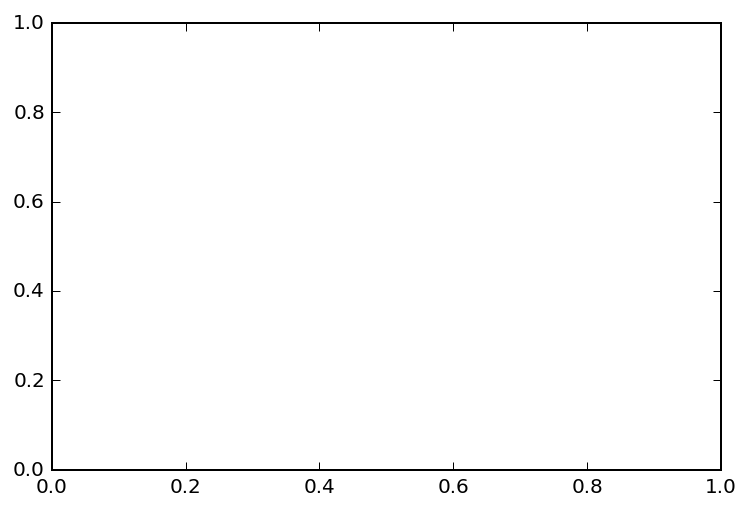

In [5]:
fig, ax = plt.subplots()

The `pyplot.subplots()` function can also be passed keyword arguments to change the number of axes (or "subplots", hence the function name) within the figure object. You can also specify the size of the figure object in inches or set [other parameters](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots).

Take note however, that specifying more than one axes within the figure object makes `pyplot.subplots()` return a tuple consisting of the figure object and a 2x2 `numpy.array` of axes object instances. The dimensions of the returned object mirror the layout, with the upper left having the indices (0,0).

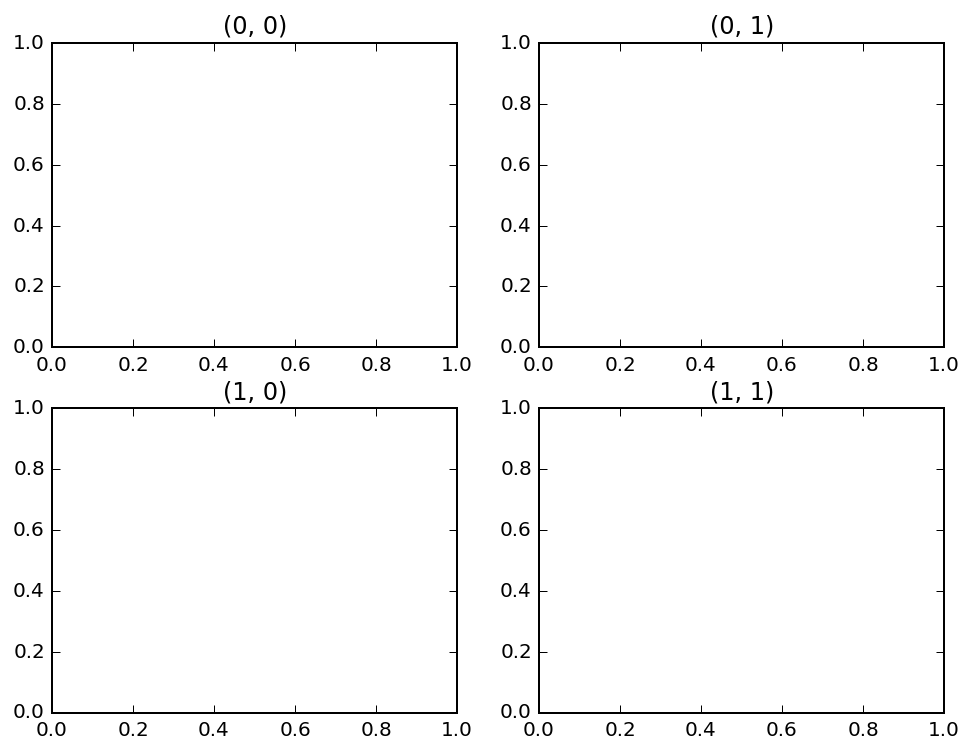

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Iterate through the 2x2 array and set titles of each
# subplot to their location in the figure object
for (n_row, n_col), axes in np.ndenumerate(ax):
    axes.set_title('(%d, %d)' % (n_row, n_col))

In [7]:
# Here ax is a 2x2 numpy.ndarray of matplotlib.axes.Axes objects
type(ax), ax.shape

(numpy.ndarray, (2, 2))

Before we start plotting, we will generate some mock data using the [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function which returns random values from a normal distribution as defined by an input mean ($\mu$) and standard devaition ($\sigma$). You can think of this data as five experimental groups with 10 samples per group. We'll then place this data into a [`pandas.DataFrame`](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) object in which each column is a different experimental group and the indices represent sample number. These data frame objects have useful methods for summarizing the data contained within.

In [8]:
# For repeatable "random" data
np.random.seed(0)

In [9]:
# Specify the mean and standard deviation for each mock data group
data_specs = [(2, 2), (7, 1), (4, 2.5), (10, 0.5), (5.5, 0.1)]

# Generate data and place into a pandas DataFrame
data = [np.random.normal(mu, sigma, 10) for mu, sigma in data_specs]
data = pd.DataFrame(data).T
data.columns = ['Group_%s' % n for n in range(1,6)]

Here's a table of our data as we defined above. Five experimental groups (columns) consisting of ten samples each. Notice how the `pandas.DataFrame` can be displayed as a convenient table in an IPython notebook.

In [10]:
data

,Group_1,Group_2,Group_3,Group_4,Group_5
0,5.528105,7.144044,-2.382475,10.077474,5.395145
1,2.800314,8.454274,5.634046,10.189081,5.357998
2,3.957476,7.761038,6.161090,9.556107,5.329373
3,6.481786,7.121675,2.144587,9.009602,5.695078
4,5.735116,7.443863,9.674387,9.826044,5.449035
5,0.045444,7.333674,0.364086,10.078174,5.456193
6,3.900177,8.494079,4.114396,10.615145,5.374720
7,1.697286,6.794842,3.532040,10.601190,5.577749
8,1.793562,7.313068,7.831948,9.806337,5.338610
9,2.821197,6.145904,7.673397,9.848849,5.478726


## Unstylized plots

On to plotting!

Here we'll plot the same data but in four different ways:

* Line Plot
* Scatter Plot
* Bar Chart
* Box Plot

To do this we can use the various plotting methods of the axes objects. Since we have five different experimental groups here, we'll first plot the means of each group as a function of its group number (except for the boxplot, which automatically plots the median, IQR, range, and outliers). Most of matplotlib's plotting functions take at minimum x and y coordinates. Note that boxplot takes a list-like object in which each element is an array or list containing the raw data values. To get these values we use the [`pandas.DataFrame.values`](http://pandas.pydata.org/pandas-docs/stable/basics.html#attributes-and-the-raw-ndarray-s) property.

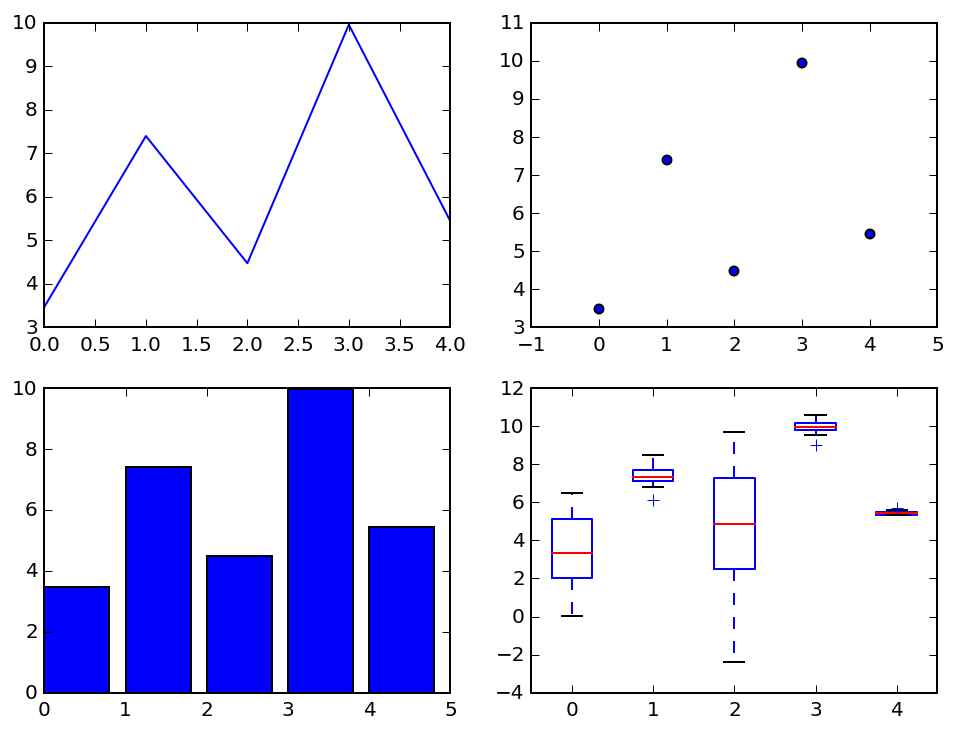

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Get the means of each group
means = data.mean()

# Generate some mock x coordinates
x = np.arange(len(means))

# Makes a line plot of the means of each group
ax[0][0].plot(x, means)

# Makes a scatter plot of the means of each group
ax[0][1].scatter(x, means)

# Makes a bar plot of the means of each group
ax[1][0].bar(x, means)

# Makes a boxplot of the data values in each group
ax[1][1].boxplot(data.values, positions=x);

In the above figure, each plot shows one way of representing the same data. You'll notice that even though the same data is plotted, the x and y axis limits are not all the same. Let's change that and make them all have the same x and y limits. We can do this by using the [`Axes.set_xlim()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlim) and [`Axes.set_ylim()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim) method of each axes object.

For the sake of convenience, we can also flatten the array of axes for more compact code when iterating through it using the [`numpy.ndarray.flat`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flat.html) method which returns a python iterator. Thank you numpy arrays.

Let's set the x-axes to go from -1 to 5 and the y-axes to go from -5 to 15.

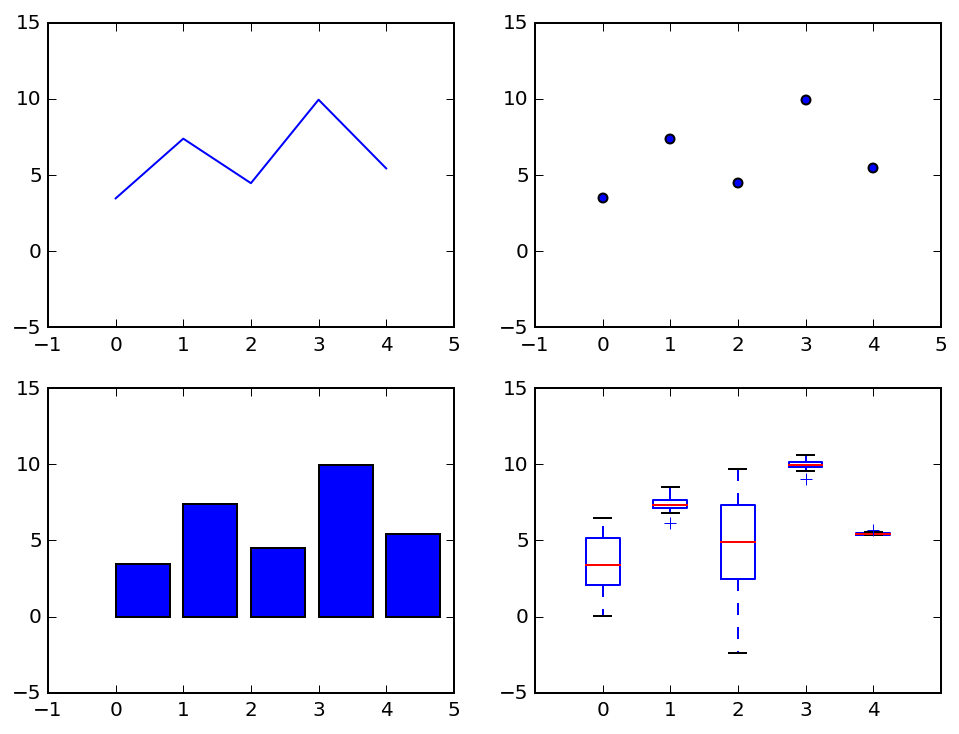

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

means = data.mean()
x = np.arange(len(means))

ax[0][0].plot(x, means)
ax[0][1].scatter(x, means)
ax[1][0].bar(x, means)
ax[1][1].boxplot(data.values, positions=x)

for axes in ax.flat:
    axes.set_xlim(-1, 5)
    axes.set_ylim(-5, 15)

Okay that looks decent for some plots but a little goofy for others like the bar chart. Let's fix that and only change the y limits for everything except the bar chart.

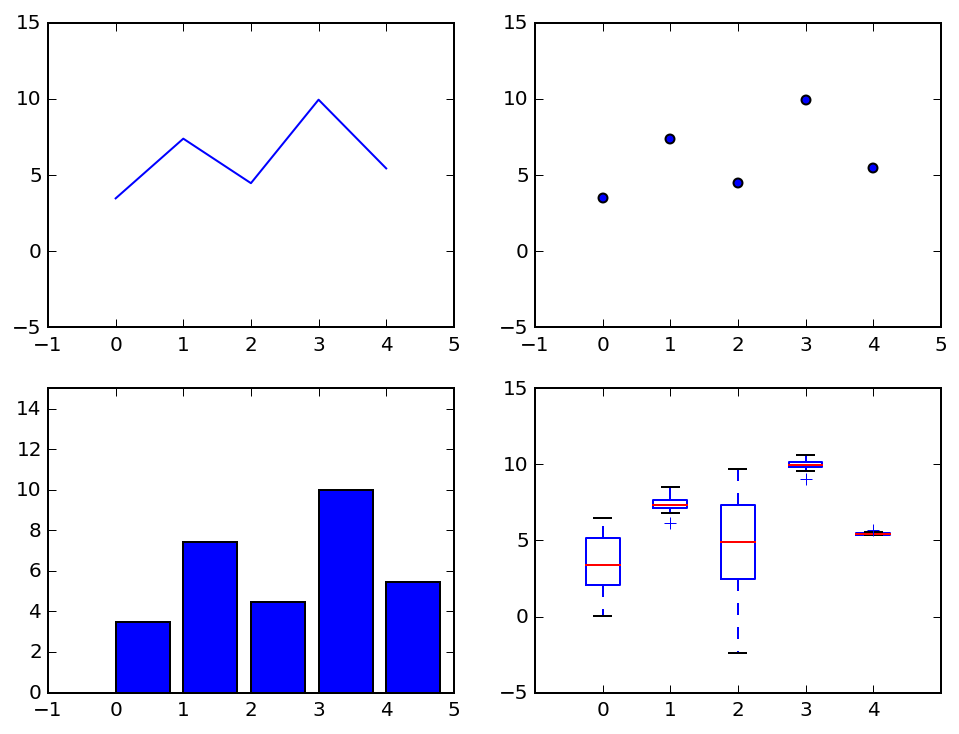

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

means = data.mean()
x = np.arange(len(means))

ax[0][0].plot(x, means)
ax[0][1].scatter(x, means)
ax[1][0].bar(x, means)
ax[1][1].boxplot(data.values, positions=x)

# Define variables for limits
xlims = (-1, 5)
ylims = (-5, 15)

# Change x and y limits
for i, axes in enumerate(ax.flat):
    if i == 2: # Special case for the bar chart
        axes.set_ylim(0, 15)
    else:
        axes.set_ylim(ylims)
    axes.set_xlim(xlims)

That looks better. Now, let's break out each plot type to illustrate how we can manipulate some basic plot aspects:

* Colors
* Markers
* Error bars

## Stylizing specific plot types

### Line plots

The most basic plotting method [`Axes.plot()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) will simply draw a line between the points. To add some flair we can add some color, change the line style and thickness, and add markers at each data point. The clearest way to do this is by passing keyword arguments to `Axes.plot()`. Note: some keyword arguments can also be abbreviated for compactness (e.g. `linestyle` can be replaced with `ls`).

(-5, 15)

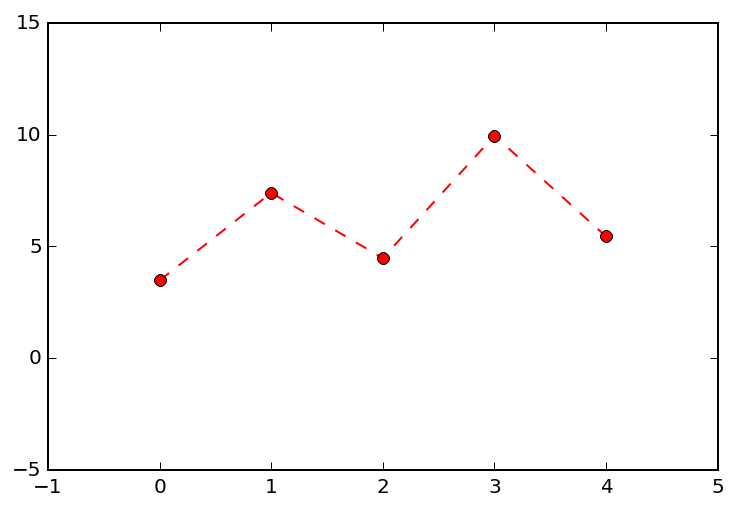

In [14]:
fig, ax = plt.subplots()

ax.plot(x, means, color='red', ls='--', marker='o')

ax.set_xlim(xlims)
ax.set_ylim(ylims)

Now let's throw in some errorbars. To do this we need to use a different plotting function: [`Axes.errorbar()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.errorbar). While `axes.plot()` will get you markers at your data points and lines between them, it does not provide functionality for creating errorbars. Passing the `yerr` keyword argument to `Axes.errorbar()` defines the errorbars to be added in the y-direction (there's also `xerr` which does what you'd expect). Your errorbar data should be 1:1 with your plotted data points. Alternatively it can be structured as a 2 x n array where n is the number of data points being plotted (here n = 5). In this case, the first dimension of 2 represents the positive and negative values for your errorbars.

There are also plenty of other keyword arguments that you can pass to errorbar to get your line plot looking nice. Here we'll use `capsize` (the width of the caps), `capthick` (the line thickness of the error bar caps) and `ecolor` (the color of the errorbars).

(-5, 15)

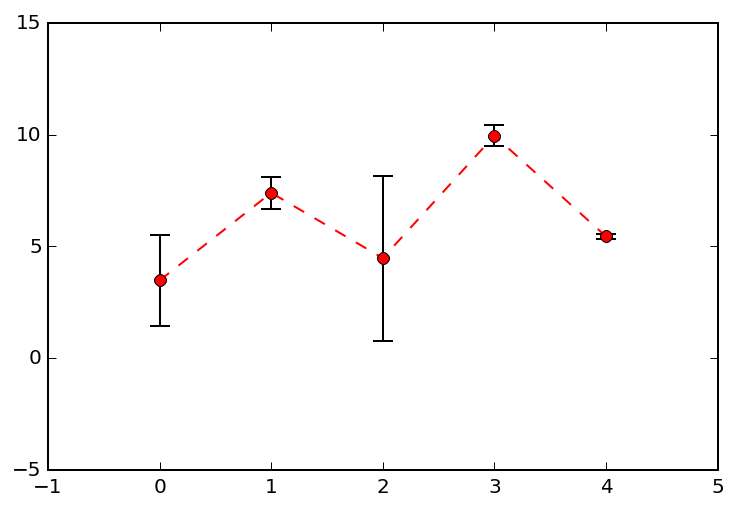

In [15]:
fig, ax = plt.subplots()

stdev = data.std()

ax.errorbar(x, means, yerr=stdev, color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')

ax.set_xlim(xlims)
ax.set_ylim(ylims)

If we want to get fancy we can wrap these keyword arguments for styling the errorbars into a dict that we will use later with the other plots for consistency.

In [16]:
error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}

### Scatter plots

Scatter plots can be created using [`Axes.scatter()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.scatter), which will simply place a marker at each x-y pair you pass into it. Again, you can style the plot by passing in keyword arguments. One of the cool things you can do with this plotting method is change the size of the markers (in points squared) using the `s` keyword argument. In our example we'll scale the marker size proportionally with our error measure. You can also change the transparency of the markers with the `alpha` keyword argument.

Note that `Axes.scatter()` does not take some keyword arguments like `linestyle` or `yerr`. If you want to create a scatter plot with errorbars, you can do so by using `Axes.errorbar()` but omit the keyword argument for linestyle.

(-5, 15)

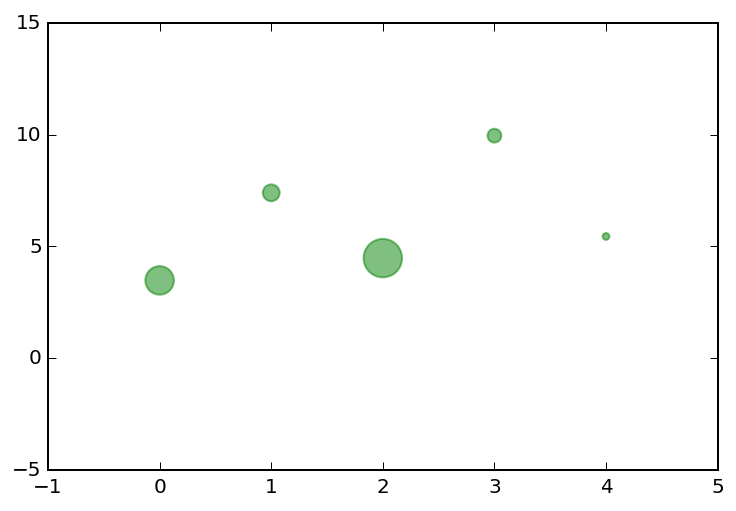

In [17]:
fig, ax = plt.subplots()

stdev = data.std()
# Scale our marker size in square points with our error measure
markersize = stdev * 100

ax.scatter(x, means, color='green', marker='o', s=markersize, alpha=0.5)

ax.set_xlim(xlims)
ax.set_ylim(ylims)

### Bar charts 

Bar charts are made using the [`Axes.bar()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar) method and depart somewhat from the previous two plotting methods we've described in that there are a few more parameters we're going to want to set.

The first is how wide to make each bar, which is set by the `width` keyword argument and is measured in x-coordinates.

Next, if we're plotting error bars, we might only want to plot the positive ones, in which case the variable we pass to `yerr` will be a 2xn matrix with the first element being only zeros. Remember the keyword arguments we passed into `Axes.errorbar()`? We can use those here as `Axes.bar()` has an `error_kw` keyword argument for error styling that it passes to `Axes.errorbar()` under the hood.

Finally, the default behavior of `Axes.bar()` is to place the left edge of each bar at its corresponding x-coordinate. To center the bar over the x-coordinate, we need to set the `align` keyword argument to `'center'`.

(0, 15)

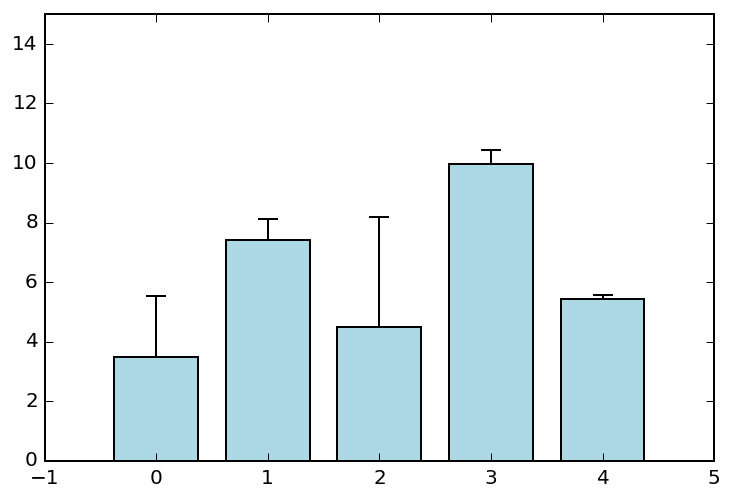

In [18]:
fig, ax = plt.subplots()

# Width of each bar in x-coordinates
width = 0.75

stdev = data.std()
# Positive error bars only
error = [np.zeros(len(stdev)), stdev]

ax.bar(x, means, color='lightblue', width=width, yerr=error, error_kw=error_kw, align='center')

ax.set_xlim(xlims)
ax.set_ylim(0, 15)

There are more complex things you can do with bar charts such as stacking them. If you're feeling adventurous check out the example [here](http://matplotlib.org/examples/pylab_examples/bar_stacked.html).

### Box plots

Box plots are made using the [`Axes.boxplot()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.boxplot) method and are nice in that they show a great deal more information about the data you're plotting than a simple mean and standard deviation.

Similar to bar charts, the width of each box plot can also be specified using the `width` keyword argument. The location of the boxplots are set with the `positions` keyword argument. In our example, we'll pass this argument our x-coordinates.

Boxplots are slightly more complicated to style as they are made up of several components: the median, the IQR (or box), the whiskers (range of the data), the caps of the whiskers, and fliers (a.k.a. outliers). In matplotlib, each of these is treated as a [`matplotlib.lines.Line2D`](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D) instance. Each of these can be styled by passing a dict of `Line2D` properties to `Axes.boxplot()` as specific keyword arguments (see the documentation for an exhaustive list). Here, we will make our boxes, whiskers, and caps solid colored lines while making our medians thicker lines of a different color. We'll also change our fliers to be an 'x' instead of a plus-sign.

(-5, 15)

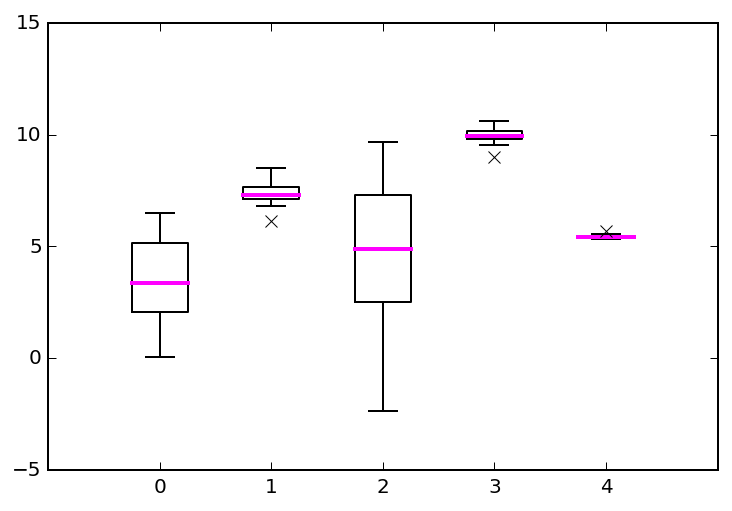

In [19]:
fig, ax = plt.subplots()

# Define styling for each boxplot component
medianprops = {'color': 'magenta', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = {'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': 'x'}

ax.boxplot(data.values,
           positions=x,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           flierprops=flierprops)

ax.set_xlim(xlims)
ax.set_ylim(ylims)

### Helper functions

Now that we've styled some plots, let's wrap the stylings into some small helper fuctions to keep things tidy. This way we can call one function on each of the axes objects in the figure and not have to worry about plot-specific styling.

In [20]:
def custom_lineplot(ax, x, y, error, xlims, ylims, color='red'):
    """Customized line plot with error bars."""
    
    ax.errorbar(x, y, yerr=error, color=color, ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_scatterplot(ax, x, y, error, xlims, ylims, color='green', markerscale=100):
    """Customized scatter plot where marker size is proportional to error measure."""
    
    markersize = error * markerscale
    
    ax.scatter(x, y, color=color, marker='o', s=markersize, alpha=0.5)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_barchart(ax, x, y, error, xlims, ylims, error_kw, color='lightblue', width=0.75):
    """Customized bar chart with positive error bars only."""
    
    error = [np.zeros(len(error)), error]
    
    ax.bar(x, y, color=color, width=width, yerr=error, error_kw=error_kw, align='center')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_boxplot(ax, x, y, error, xlims, ylims, mediancolor='magenta'):
    """Customized boxplot with solid black lines for box, whiskers, caps, and outliers."""
    
    medianprops = {'color': mediancolor, 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-'}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    
    ax.boxplot(y,
               positions=x,
               medianprops=medianprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               flierprops=flierprops)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax

## Putting it all together with axes styling

If the default matplotlib axes is not what you're looking for, you can change the appearance with a few lines of code. You can set the properties of each spine through `Axes.spines` which is a dict of each of the four spines (top, bottom, left, right). Similarly you can access the tick properties of each axis through `Axes.xaxis` and `Axes.yaxis`. Personally, I prefer having the axes spines only on the left and bottom of my plots with the x and y ticks on the outside edges.

In [21]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)

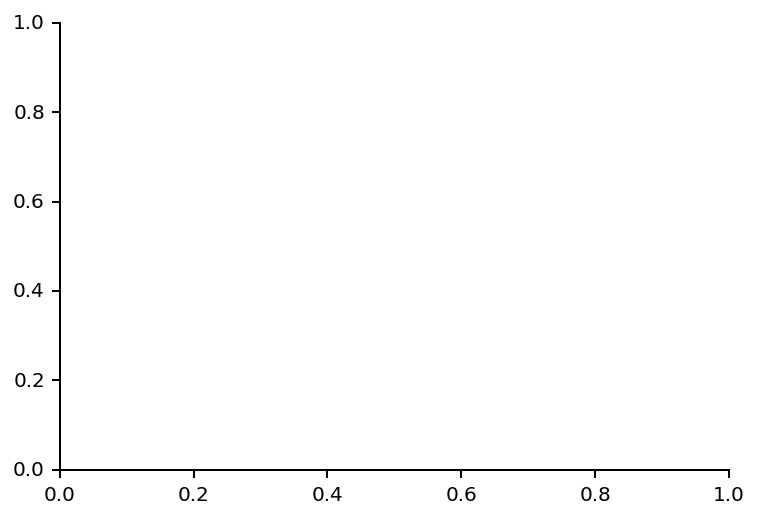

In [22]:
fig, ax = plt.subplots()

stylize_axes(ax)

Now let's generate our four plots using our custom plot and axes stylings.

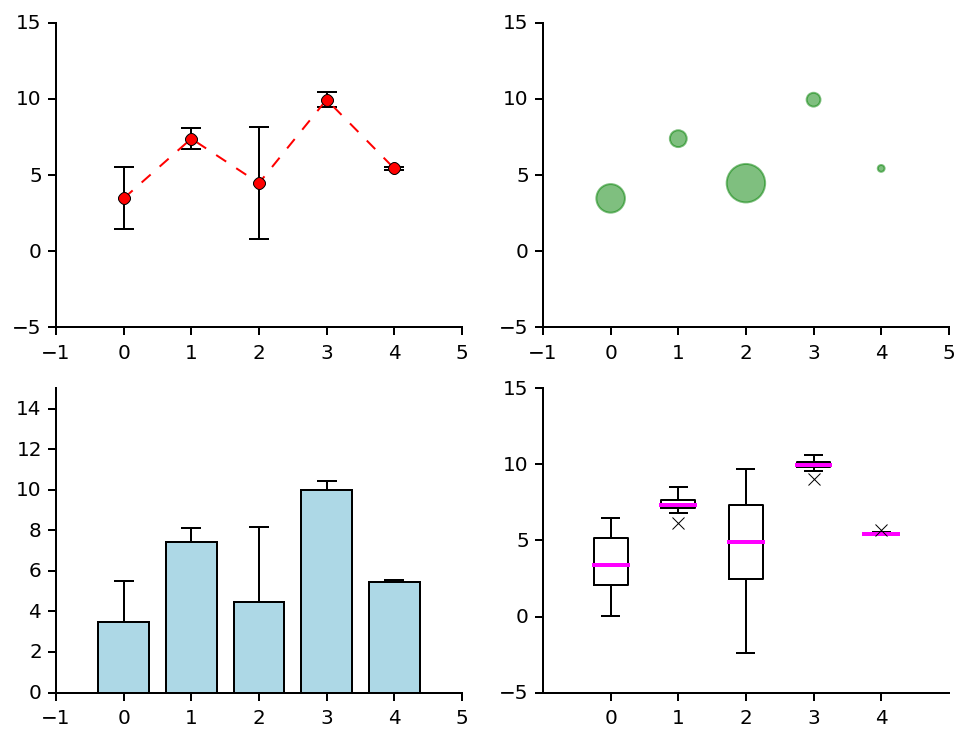

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

for axes in ax.flat:
    stylize_axes(axes)

Looks pretty good, although there are a few obvious things missing:

* Axis labels
* Consistent tick labeling
* Chart titles

Let's address these one by one.

###  Axis labels

The label for a specific axis can be easily set using the [`Axes.set_xlabel()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlabel) and [`Axes.set_ylabel()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylabel) methods.

### Consistent tick labeling

Tick location and labeling are handled by [`Axes.set_xticks()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticks) and [`Axes.set_xticklabels()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) respectively (there are analogous methods for the y axis as well.

### Chart titles

Similar to axis labels, the title displayed above a specific axes is set using [`Axes.set_title()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_title).

Now let's update our styling helper function to update these settings.

In [24]:
def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

## Adjusting the layout

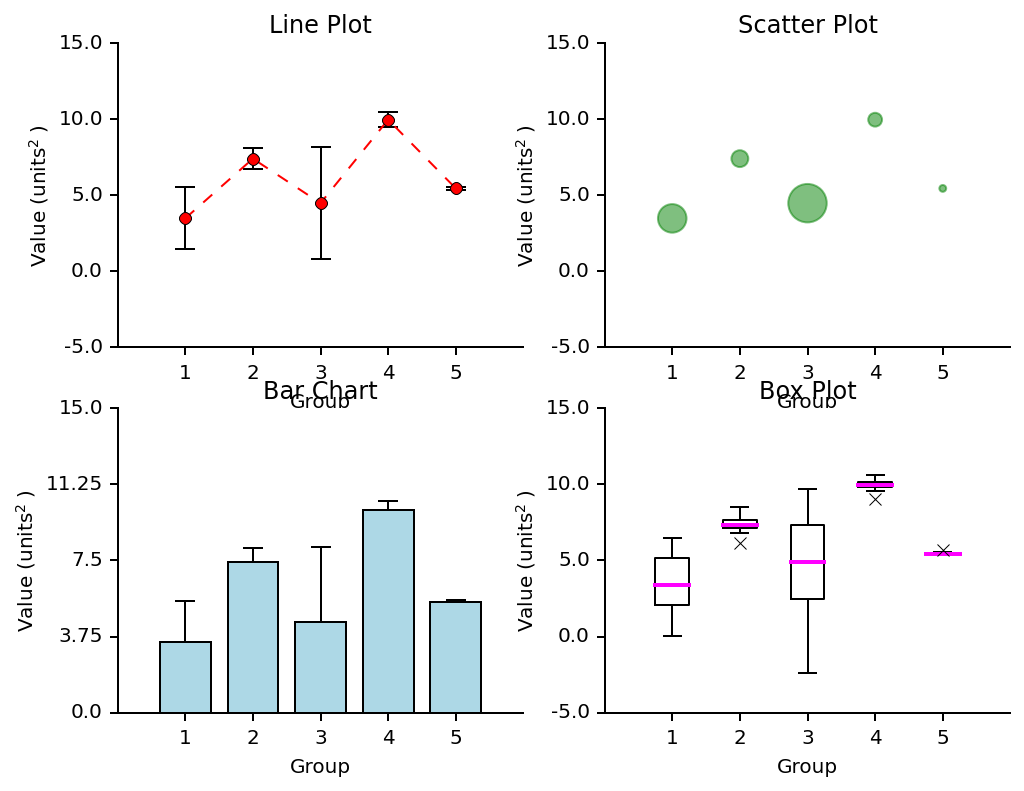

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

titles = ['Line Plot', 'Scatter Plot', 'Bar Chart', 'Box Plot']
xlabel = 'Group'
ylabel = 'Value ($units^2$)'
xticks = x
xticklabels = range(1,6)

for i, axes in enumerate(ax.flat):
    yticks = np.linspace(axes.get_ylim()[0], axes.get_ylim()[1], 5)
    yticklabels = yticks
    stylize_axes(axes, titles[i], xlabel, ylabel, xticks, yticks, xticklabels, yticklabels)

Hmm...what's up with the overlap? We can use [`Figure.tight_layout()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.set_tight_layout) to automatically resize the elements of our plots to eliminate overlap.

## The final product

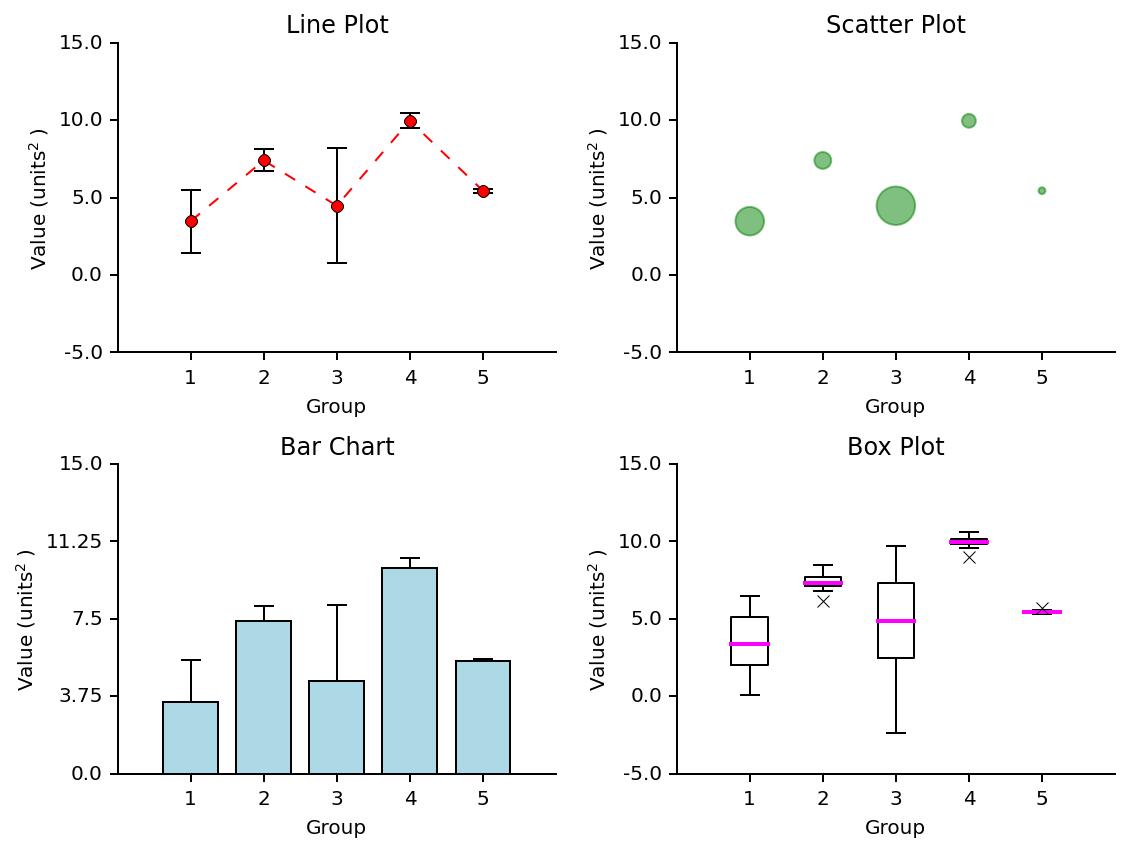

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

titles = ['Line Plot', 'Scatter Plot', 'Bar Chart', 'Box Plot']
xlabel = 'Group'
ylabel = 'Value ($units^2$)'
xticks = x
xticklabels = range(1,6)

for i, axes in enumerate(ax.flat):
    # Customize y ticks on a per-axes basis
    yticks = np.linspace(axes.get_ylim()[0], axes.get_ylim()[1], 5)
    yticklabels = yticks
    stylize_axes(axes, titles[i], xlabel, ylabel, xticks, yticks, xticklabels, yticklabels)
    
fig.tight_layout()

Much better! Now we're ready to export the figure object so we can use it in our publication. We can do this using [`Figure.savefig()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig) and pass it the filename, resolution (in DPI), padding whitespace, and transparency (if desired).

In [27]:
fig.savefig('Stylized Plots.png', dpi=300, bbox_inches='tight', transparent=True)